<a href="https://colab.research.google.com/github/dongjaekim-hail/coloring_hex/blob/main/color_munsell.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%env COLOUR_SCIENCE__COLOUR__IMPORT_VAAB_COLOUR=true
!pip install -q colour-science

# Uncomment the following lines for the latest develop branch content.
!pip uninstall -y colour-science
!if ! [ -d "colour" ]; then git clone https://github.com/colour-science/colour; fi
!if [ -d "colour" ]; then cd colour && git fetch && git checkout develop && git pull && cd ..; fi

import sys
sys.path.insert(0, 'colour')

env: COLOUR_SCIENCE__COLOUR__IMPORT_VAAB_COLOUR=true
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 36.2 MB/s eta 0:00:00
Found existing installation: colour-science 0.4.6
Uninstalling colour-science-0.4.6:
  Successfully uninstalled colour-science-0.4.6
Cloning into 'colour'...
remote: Enumerating objects: 70703, done.
remote: Counting objects: 100% (6627/6627), done.
remote: Compressing objects: 100% (2390/2390), done.
remote: Total 70703 (delta 5030), reused 5514 (delta 4203), pack-reused 64076 (from 1)
Receiving objects: 100% (70703/70703), 125.79 MiB | 19.58 MiB/s, done.
Resolving deltas: 100% (54895/54895), done.
Already on 'develop'
Your branch is up to date with 'origin/develop'.
Already up to date.


In [2]:
!git clone https://github.com/davidwcraig/munspace.git

Cloning into 'munspace'...
remote: Enumerating objects: 46, done.
remote: Counting objects: 100% (46/46), done.
remote: Compressing objects: 100% (34/34), done.
remote: Total 46 (delta 22), reused 28 (delta 11), pack-reused 0 (from 0)
Receiving objects: 100% (46/46), 619.00 KiB | 22.11 MiB/s, done.
Resolving deltas: 100% (22/22), done.


In [3]:
import colour

print(colour.__all__[:5] + ['...'])

['domain_range_scale', 'get_domain_range_scale', 'set_domain_range_scale', 'CHROMATIC_ADAPTATION_METHODS', 'CHROMATIC_ADAPTATION_TRANSFORMS', '...']


In [6]:
import pandas as pd

# file_path = './munspace/real_sRGB.xls'
# df = pd.read_excel(file_path, sheet_name='data')

file_path = './munspace/all.dat'
df = pd.read_csv(file_path, delim_whitespace=True)


<ipython-input-6-4267adc79b5c>:7: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True)


In [7]:
'''
       1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 18 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40
A  0                                                                                                                           9.5
B  0   2  2  2  2  2  2  2  2  4  6  6  6  6  4  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  9.0
C  0   6  6  6  6  6  6  8 14 16 14 12 12 12 10 10  8  8  6  6  6  6  4  4  4  4  4  4  4  6  6  4  4  4  4  6  6  6  6  6  6  8.0
D  0   8  8 10 10 10 14 14 14 12 12 12 12 12 12 10 10 10  8  8  8  8  8  6  6  6  6  6  8  8  8  6  6  6  6  8  8 10 10  8  8  7.0
E  0  12 12 12 14 16 12 12 12 10 10 10 10 10 10 12 12 10 10 10 10  8  8  8  8  8  8  8 10 10 10  8  8  8  8 10 10 10 10 12 12  6.0
F  0  14 14 14 16 14 12 10 10  8  8  8  8  8  8 10 12 12 10 10 10 10  8  8  8  8  8  8 10 12 12 10 10 10 10 10 12 12 12 14 14  5.0
G  0  14 14 14 14 10  8  8  6  6  6  6  6  6  6  8  8 10 10 10 10  8  8  8  8  6  6  8  8 10 10 12 10 10 10 10 10 10 10 10 10  4.0
H  0  10 10 12 10  8  6  6  6  4  4  4  4  4  4  6  6  8  8 10  8  6  6  6  6  6  6  6  8 10 10 12 10 10 10 10 10 10 10 10 10  3.0
I  0   8  8  8  6  4  4  4  2  2  2  2  2  2  2  4  4  4  6  6  6  4  4  4  4  4  4  6  6  6  8 10  8  8  8  6  6  8  8  8  8  2.0
J  0                                                                                                                           1.5
     2.5 5 7.5 10|    5    10|    5    10|    5    10|    5    10|    5    10|    5    10|    5    10|    5    10|    5    10|
         R       |   YR      |    Y      |    GY     |    G      |     BG    |    B      |    BP     |    P      |    RP     |

Note: Munsell and WCS coordinates for stimulus palette. The leftmost column and the top row give the WCS coordinates for lightness and hue respectively.  The rightmost column and the bottom two rows give the Munsell coordinates for Value and Hue, respectively.  Entries in the body of the table show the corresponding Munsell Chroma numbers. (With regard to the A and J rows, there are no Munsell hues at the extremes of Value (lightness): 9.5 (white) and 1.5 (black).)
'''

'\n       1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 18 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40\nA  0                                                                                                                           9.5\nB  0   2  2  2  2  2  2  2  2  4  6  6  6  6  4  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  9.0\nC  0   6  6  6  6  6  6  8 14 16 14 12 12 12 10 10  8  8  6  6  6  6  4  4  4  4  4  4  4  6  6  4  4  4  4  6  6  6  6  6  6  8.0\nD  0   8  8 10 10 10 14 14 14 12 12 12 12 12 12 10 10 10  8  8  8  8  8  6  6  6  6  6  8  8  8  6  6  6  6  8  8 10 10  8  8  7.0\nE  0  12 12 12 14 16 12 12 12 10 10 10 10 10 10 12 12 10 10 10 10  8  8  8  8  8  8  8 10 10 10  8  8  8  8 10 10 10 10 12 12  6.0\nF  0  14 14 14 16 14 12 10 10  8  8  8  8  8  8 10 12 12 10 10 10 10  8  8  8  8  8  8 10 12 12 10 10 10 10 10 12 12 12 14 14  5.0\nG  0  14 14 14 14 10  8  8  6  6  6  6  6  6  6  8  8 10 10 10 10  8  8  8  8 

In [8]:
import numpy as np

In [9]:
# grey_chroma = np.array([0,0,0,0,0,0,0,0,0,0])

chroma = np.array([
 [ 2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  4.,  6.,  6.,  6.,  6.,  4.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.],
 [ 6.,  6.,  6.,  6.,  6.,  6.,  8., 14., 16., 14., 12., 12., 12., 10., 10.,  8.,  8.,  6.,  6.,  6.,  6.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  6.,  6.,  4.,  4.,  4.,  4.,  6.,  6.,  6.,  6.,  6.,  6., ],
 [ 8.,  8., 10., 10., 10., 14., 14., 14., 12., 12., 12., 12., 12., 12., 10., 10., 10.,  8.,  8.,  8.,  8.,  8.,  6.,  6.,  6.,  6.,  6.,  8.,  8.,  8.,  6.,  6.,  6.,  6.,  8.,  8., 10., 10.,  8.,  8., ],
 [12., 12., 12., 14., 16., 12., 12., 12., 10., 10., 10., 10., 10., 10., 12., 12., 10., 10., 10., 10.,  8.,  8.,  8.,  8.,  8.,  8.,  8., 10., 10., 10.,  8.,  8.,  8.,  8., 10., 10., 10., 10., 12., 12., ],
 [14., 14., 14., 16., 14., 12., 10., 10.,  8.,  8.,  8.,  8.,  8.,  8., 10., 12., 12., 10., 10., 10., 10.,  8.,  8.,  8.,  8.,  8.,  8., 10., 12., 12., 10., 10., 10., 10., 10., 12., 12., 12., 14., 14., ],
 [14., 14., 14., 14., 10.,  8.,  8.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  8.,  8., 10., 10., 10., 10.,  8.,  8.,  8.,  8.,  6.,  6.,  8.,  8., 10., 10., 12., 10., 10., 10., 10., 10., 10., 10., 10., 10., ],
 [10., 10., 12., 10.,  8.,  6.,  6.,  6.,  4.,  4.,  4.,  4.,  4.,  4.,  6.,  6.,  8.,  8., 10.,  8.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  8., 10., 10., 12., 10., 10., 10., 10., 10., 10., 10., 10., 10., ],
 [ 8.,  8.,  8.,  6.,  4.,  4.,  4.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  4.,  4.,  4.,  6.,  6.,  6.,  4.,  4.,  4.,  4.,  4.,  4.,  6.,  6.,  6.,  8., 10.,  8.,  8.,  8.,  6.,  6.,  8.,  8.,  8.,  8., ]
])

In [10]:
hue = []
values = [9, 8, 7, 6, 5, 4, 3, 2]
for i in range(8):
  value_ = values[i]
  hue__ = []
  for j in range(40):
    if j < 4:
      if j==0:
        hue_ = '2.5'
      elif j==1:
        hue_ = '5'
      elif j==2:
        hue_ = '7.5'
      elif j==3:
        hue_ = '10'
      hue_ += 'R'

    elif j < 8:
      if j < 6:
        hue_ = '5'
      else:
        hue_ = '10'
      hue_ += 'YR'

    elif j < 12:
      if j < 10:
        hue_ = '5'
      else:
        hue_ = '10'
      hue_ += 'Y'

    elif j < 16:
      if j < 14:
        hue_ = '5'
      else:
        hue_ = '10'
      hue_ += 'GY'

    elif j < 20:
      if j < 18:
        hue_ = '5'
      else:
        hue_ = '10'
      hue_ += 'G'

    elif j < 24:
      if j < 22:
        hue_ = '5'
      else:
        hue_ = '10'
      hue_ += 'BG'

    elif j < 28:
      if j < 26:
        hue_ = '5'
      else:
        hue_ = '10'
      hue_ += 'B'

    elif j < 32:
      if j < 30:
        hue_ = '5'
      else:
        hue_ = '10'
      hue_ += 'PB'

    elif j < 36:
      if j < 34:
        hue_ = '5'
      else:
        hue_ = '10'
      hue_ += 'P'

    elif j < 40:
      if j < 38:
        hue_ = '5'
      else:
        hue_ = '10'
      hue_ += 'RP'

    hue__.append(hue_ + ' ' + str(value_) + ' ' + str(int(chroma[i][j])))
  hue.append(hue__)
  print(hue)

[['2.5R 9 2', '5R 9 2', '7.5R 9 2', '10R 9 2', '5YR 9 2', '5YR 9 2', '10YR 9 2', '10YR 9 2', '5Y 9 4', '5Y 9 6', '10Y 9 6', '10Y 9 6', '5GY 9 6', '5GY 9 4', '10GY 9 2', '10GY 9 2', '5G 9 2', '5G 9 2', '10G 9 2', '10G 9 2', '5BG 9 2', '5BG 9 2', '10BG 9 2', '10BG 9 2', '5B 9 2', '5B 9 2', '10B 9 2', '10B 9 2', '5PB 9 2', '5PB 9 2', '10PB 9 2', '10PB 9 2', '5P 9 2', '5P 9 2', '10P 9 2', '10P 9 2', '5RP 9 2', '5RP 9 2', '10RP 9 2', '10RP 9 2']]
[['2.5R 9 2', '5R 9 2', '7.5R 9 2', '10R 9 2', '5YR 9 2', '5YR 9 2', '10YR 9 2', '10YR 9 2', '5Y 9 4', '5Y 9 6', '10Y 9 6', '10Y 9 6', '5GY 9 6', '5GY 9 4', '10GY 9 2', '10GY 9 2', '5G 9 2', '5G 9 2', '10G 9 2', '10G 9 2', '5BG 9 2', '5BG 9 2', '10BG 9 2', '10BG 9 2', '5B 9 2', '5B 9 2', '10B 9 2', '10B 9 2', '5PB 9 2', '5PB 9 2', '10PB 9 2', '10PB 9 2', '5P 9 2', '5P 9 2', '10P 9 2', '10P 9 2', '5RP 9 2', '5RP 9 2', '10RP 9 2', '10RP 9 2'], ['2.5R 8 6', '5R 8 6', '7.5R 8 6', '10R 8 6', '5YR 8 6', '5YR 8 6', '10YR 8 8', '10YR 8 14', '5Y 8 16', '5Y 

In [11]:
xyY_codes = []
for i in range(8):
  xyY_codes_ = []
  for j in range(40):
    Hue, Value, Chroma =hue[i][j].split(' ')
    # find from df where column h is Hue, column V is Value, column C is Chroma
    filtered_df = df[(df['H'] == Hue) & (df['V'] == int(Value)) & (df['C'] == int(Chroma))]
    xyY_codes_.append([filtered_df['x'].iloc[0], filtered_df['y'].iloc[0], filtered_df['Y'].iloc[0], ])
  xyY_codes.append(xyY_codes_)
print(xyY_codes)
xyY_codes=np.array(xyY_codes)

[[[0.32200000000000001, 0.31680000000000003, 78.659999999999997], [0.32400000000000001, 0.31879999999999997, 78.659999999999997], [0.32629999999999998, 0.32100000000000001, 78.659999999999997], [0.32840000000000003, 0.32329999999999998, 78.659999999999997], [0.33529999999999999, 0.33250000000000002, 78.659999999999997], [0.33529999999999999, 0.33250000000000002, 78.659999999999997], [0.3392, 0.34300000000000003, 78.659999999999997], [0.3392, 0.34300000000000003, 78.659999999999997], [0.36209999999999998, 0.37990000000000002, 78.659999999999997], [0.38579999999999998, 0.40710000000000002, 78.659999999999997], [0.37609999999999999, 0.41549999999999998, 78.659999999999997], [0.37609999999999999, 0.41549999999999998, 78.659999999999997], [0.35720000000000002, 0.41789999999999999, 78.659999999999997], [0.34370000000000001, 0.3861, 78.659999999999997], [0.31240000000000001, 0.34539999999999998, 78.659999999999997], [0.31240000000000001, 0.34539999999999998, 78.659999999999997], [0.3017000000

In [92]:
from colour import xy_to_xyY, xyY_to_XYZ, XYZ_to_RGB, XYZ_to_sRGB
from colour.notation import RGB_to_HEX
from colour.models import RGB_COLOURSPACE_sRGB
ILLUMINANT_XY = colour.CCS_ILLUMINANTS['CIE 1931 2 Degree Standard Observer']['C']

colourspace = colour.RGB_COLOURSPACES['CIE RGB']
# colourspace = colour.RGB_COLOURSPACES['PLASA ANSI E1.54']
# colourspace = colour.RGB_COLOURSPACES['ITU-R BT.2020']


XYZ = xyY_to_XYZ(xyY_codes)
RGB = colour.XYZ_to_sRGB(XYZ/100, illuminant=ILLUMINANT_XY)
RGB_codes = RGB_to_HEX(RGB)

<ipython-input-93-ce2e777b71bb>:7: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax.add_patch(plt.Rectangle((0, i), 1, 1, color=grayscale_codes[i], edgecolor='none'))
<ipython-input-93-ce2e777b71bb>:13: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax.add_patch(plt.Rectangle((col + 1, row + 1), 1, 1, color=hex_code, edgecolor='none'))
<ipython-input-93-ce2e777b71bb>:17: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax.add_patch(plt.Rectangle((col, 0), 1, 1, color="#FFFFFF", edgecolor='none'))
<ipython-input-93-ce2e777b71bb>:23: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax.add_patch(plt.Rectangle((col, row), 1, 1, color="#FFFFFF", edgecolor='none'))


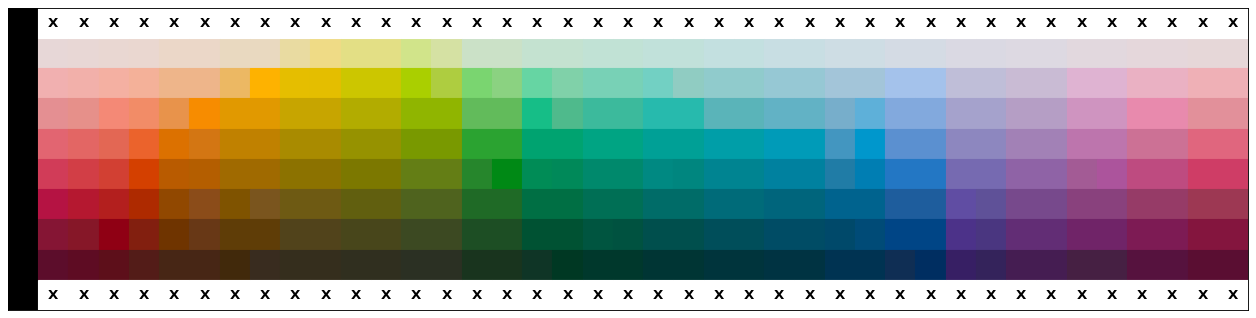

In [93]:
import matplotlib.pyplot as plt
# 그림 생성
fig, ax = plt.subplots(figsize=(20,6), dpi=80)  # figsize와 dpi 조정
grayscale_codes = [[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0]]
# 왼쪽 그레이스케일 팔레트 추가 (10행 1열)
for i in range(len(grayscale_codes)):
    ax.add_patch(plt.Rectangle((0, i), 1, 1, color=grayscale_codes[i], edgecolor='none'))

# 오른쪽 색상 배열 추가 (8행 40열) - 한 칸 아래로 내림
for row in range(len(RGB_codes)):
    for col in range(len(RGB_codes[0])):
        hex_code = RGB_codes[row][col]
        ax.add_patch(plt.Rectangle((col + 1, row + 1), 1, 1, color=hex_code, edgecolor='none'))

# 맨 위쪽 행에 'X' 표시 추가 (1열 제외)
for col in range(1, len(RGB_codes[0]) + 1):
    ax.add_patch(plt.Rectangle((col, 0), 1, 1, color="#FFFFFF", edgecolor='none'))
    ax.text(col + 0.5, 0.5, 'X', va='center', ha='center', fontsize=12, color='black', fontweight='bold')

# 나머지 공간을 흰색으로 채우고 'X' 표시 추가
for row in range(len(RGB_codes) + 1, len(grayscale_codes)):
    for col in range(1, len(RGB_codes[0]) + 1):
        ax.add_patch(plt.Rectangle((col, row), 1, 1, color="#FFFFFF", edgecolor='none'))
        ax.text(col + 0.5, row + 0.5, 'X', va='center', ha='center', fontsize=12, color='black', fontweight='bold')



# 축 설정
ax.set_xlim(0, len(RGB_codes[0]) + 1)
ax.set_ylim(0, len(grayscale_codes))
ax.set_xticks([])
ax.set_yticks([])
ax.set_aspect('equal')
ax.invert_yaxis()

plt.show()

In [94]:
RGB_codes

array([['#e7d7d7', '#e8d7d5', '#e9d7d2', '#ead7d0', '#ebd7c8', '#ebd7c8',
        '#e9d9c0', '#e9d9c0', '#e9dba1', '#efdb86', '#e3df85', '#e3df85',
        '#d1e48a', '#d5e1a3', '#cbe1c7', '#cbe1c7', '#c4e2d0', '#c4e2d0',
        '#c1e2d5', '#c1e2d5', '#c1e1da', '#c1e1da', '#c3e0e0', '#c3e0e0',
        '#c8dee3', '#c8dee3', '#cedde4', '#cedde4', '#d4dbe4', '#d4dbe4',
        '#dad9e3', '#dad9e3', '#ddd9e2', '#ddd9e2', '#e2d8de', '#e2d8de',
        '#e5d7db', '#e5d7db', '#e6d7d8', '#e6d7d8'],
       ['#f1b0b0', '#f2b0aa', '#f4b0a2', '#f4b199', '#eeb58a', '#eeb58a',
        '#ecb863', '#feb200', '#e5be00', '#e4be00', '#ccc600', '#ccc600',
        '#aacf00', '#aecd40', '#7ad570', '#8bd281', '#66d5a3', '#80d1a9',
        '#78d1b6', '#78d1b6', '#72d0c3', '#90ccc2', '#90cbcc', '#90cbcc',
        '#96c8d4', '#96c8d4', '#a3c5d9', '#a3c5d9', '#a4c2eb', '#a4c2eb',
        '#bfbed8', '#bfbed8', '#c9bbd4', '#c9bbd4', '#dfb3d2', '#dfb3d2',
        '#eab1c3', '#eab1c3', '#efb0b6', '#efb0b6'],
      